In [22]:
import cv2
import numpy as np

#read image
img = cv2.imread('road.jpg',cv2.IMREAD_COLOR)

#convert
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#find the edges in the image using canny detector
edges = cv2.Canny(gray,50,200)

#detect point that form a line
lines=cv2.HoughLinesP(edges,1,np.pi/180,50,minLineLength=100,maxLineGap=20)

#draw lines on the image
for line in lines :
    x1,y1,x2,y2=line[0]
    cv2.line(img,(x1,y1),(x2,y2),(255,0,0),3)
    
cv2.imshow("Result Image",img)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [38]:
import cv2

#read image
img = cv2.imread('eye.jpg')

#convert
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#apply gaussian blur,using 5x5 gaussian filtering
blue=cv2.GaussianBlur(gray,(5,5),0,0)

#circles=cv2.HoughCircles(img_blur,cv2.HOUGH_GRADIENT,1,img.shape[0]/64,param1=200,param2=15,\minRadius=5,maxRadius=30)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

#draw detected circles
if circles is not None:
    circles=np.int16(np.around(circles))
    for i in circles[0,:]:
        cv.circles(img(i[0],i[1],i[2],(0,255,0),2)
                       
cv2.imshow("output",img)

cv2.waitKey(0)
cv2.destroyAllWindows()


SyntaxError: invalid syntax (<ipython-input-38-c885d5ba01d2>, line 22)

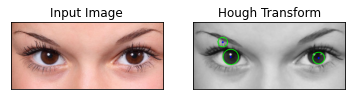

In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

bgr_img = cv2.imread('eye.jpg') # read as it is

if bgr_img.shape[-1] == 3:           # color image
    b,g,r = cv2.split(bgr_img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
else:
    gray_img = bgr_img

img = cv2.medianBlur(gray_img, 5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=200,param2=15,minRadius=5,maxRadius=30)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.subplot(121),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cimg)
plt.title('Hough Transform'), plt.xticks([]), plt.yticks([])
plt.show()